The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path += ["../../../easyXRD"]


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---ipympl package with version 0.9.4 is available and can be imported 
---pymatgen package with version 2024.8.9 is available and can be imported 
---numpy package with version 1.26.4 is available and can be imported 
---xarray package with version 2024.7.0 is available and can be imported 
---pyFAI package with version 2024.5.0 is available and can be imported 
---scipy package with version 1.14.0 is available and can be imported 
---fabio package with version 2024.4.0 is available and can be imported 
---pandas package with version 2.2.2 is available and can be imported 
---mp_api package with version 0.42.1 is available and can be imported 


Imported easyxrd with the following configuration:

- easyxrd_scratch_path : /home/mt/.easyxrd_scratch
- gsasii_lib_path : /home/mt/g2full/GSAS-II/GSASII
- mp_api_key : dHgNQRNYSpuizBPZYYab75iJNMJYCklB



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams["figure.constrained_layout.use"] = True

In [4]:
%%time


# import pyFAI,fabio
# ai_file = 'tiff_files/_calibration.poni'
# mask_file = 'tiff_files/_mask.edf'
# ai = pyFAI.load(ai_file)
# mask = fabio.open(mask_file).data

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file="nc_files/Kapton.nc", plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file="nc_files/Air.nc", plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file="nc_files/NIST-LaB6.nc", plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file="nc_files/NIST-CeO2.nc", plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file="nc_files/NIST-LaB6-CeO2-mix.nc", plot=False)

phases_LaB6 = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_CeO2 = [
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

phases_mix = [
    {
        "mp_id": "none",
        "cif": "_cifs/LaB6_a=4.1568_NIST_value.cif",
        "label": "LaB6",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
    {
        "mp_id": "none",
        "cif": "_cifs/CeO2_a=5.4113_NIST_value.cif",
        "label": "CeO2",
        "scale": 1.00,
        "scale_a": 1,
        "scale_b": 1,
        "scale_c": 1,
    },
]

CPU times: user 90.5 ms, sys: 1.03 ms, total: 91.5 ms
Wall time: 90.4 ms



 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 11.466/0.162 on 1 variable(s) 

 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.451/0.091 on 2 variable(s) (was 11.466(-43.74%)/0.162(-43.73%✨))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 7.374/0.104 on 1 variable(s) (was 6.451(14.30%)/0.091(14.28%❗))
CPU times: user 10.1 s, sys: 61 ms, total: 10.2 s
Wall time: 10.4 s


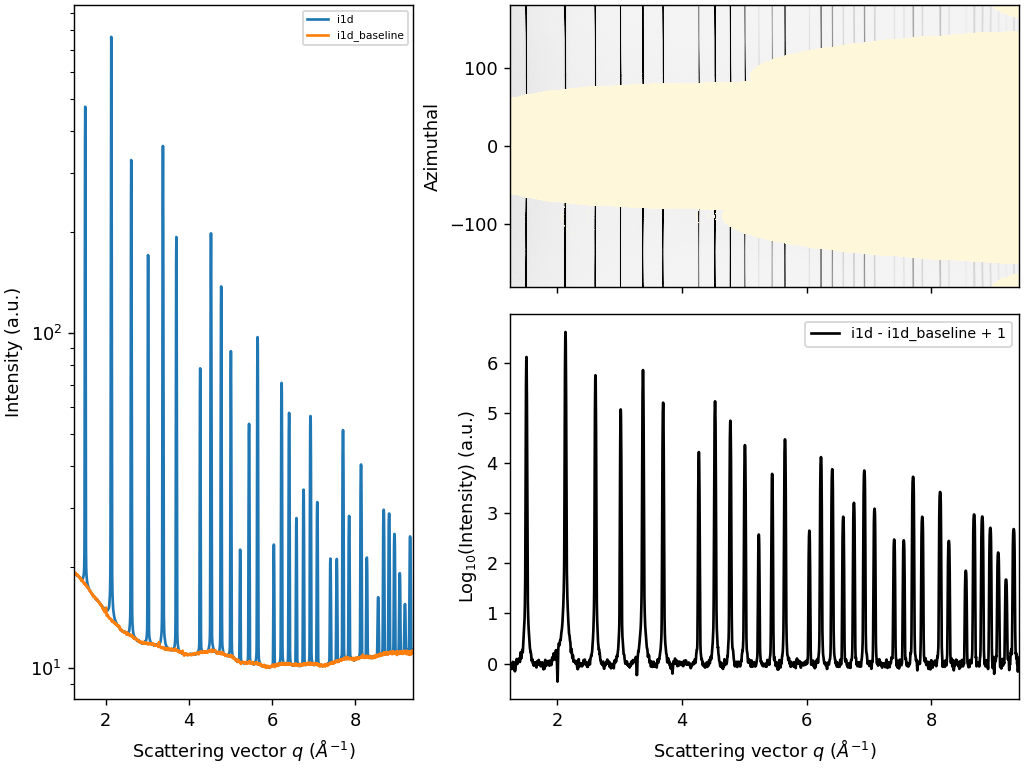

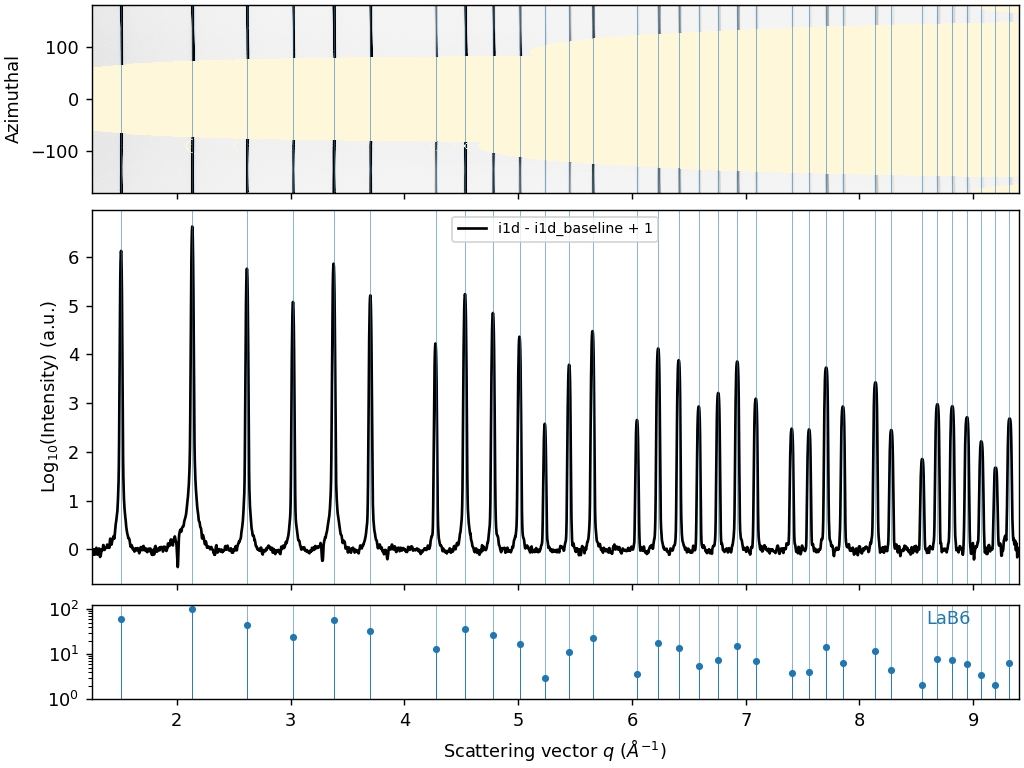

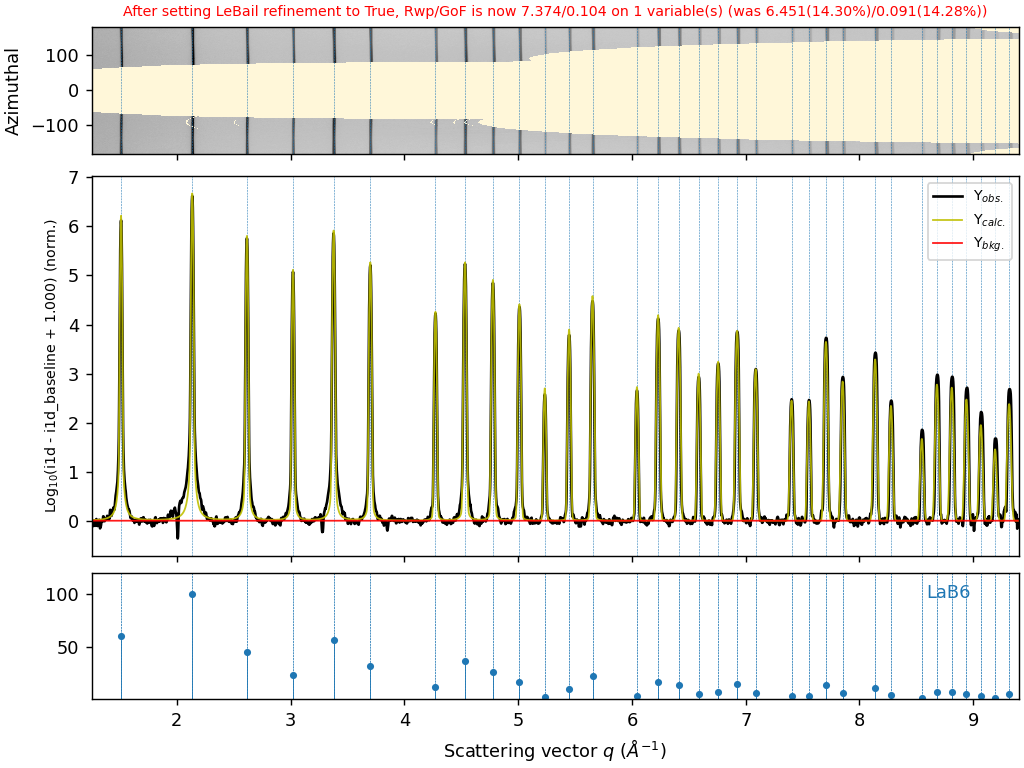

In [8]:
%%time

sample = deepcopy(sample_LaB6)
phases = phases_LaB6

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_parameters()
sample.set_LeBail(set_to=False, refine=True, plot=True)


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 14.343/0.191 on 1 variable(s) 

 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.432/0.086 on 2 variable(s) (was 14.343(-55.16%)/0.191(-55.15%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 6.313/0.084 on 2 variable(s) (was 6.432(-1.85%)/0.086(-1.85%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 6.198/0.083 on 2 variable(s) (was 6.313(-1.82%)/0.084(-1.82%))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 8.252/0.110 on 1 variable(s) (was 6.198(33.15%)/0.083(33.13%❗))
 ✅--Phase fractions of phases are refined. Rwp/GoF is now 8.252/0.110 on 1 variable(s) (was 8.252(0.00%)/0.110(0.00%❗))
 ✅--U property of Ce0 site of CeO2 phase is refined. Rwp/GoF is now 6.661/0.089 on 2 variable(s) (was 8.252(-19.29%)/0.110(-19.27%✨))
 ✅--U property of O1 site of CeO2 phase is refined. Rwp/GoF is now 6.634/0.088 on 3 variable(s) (was 6.661(-0.40%)/0.089(-0.39%❗))
CPU times: user 7.2 

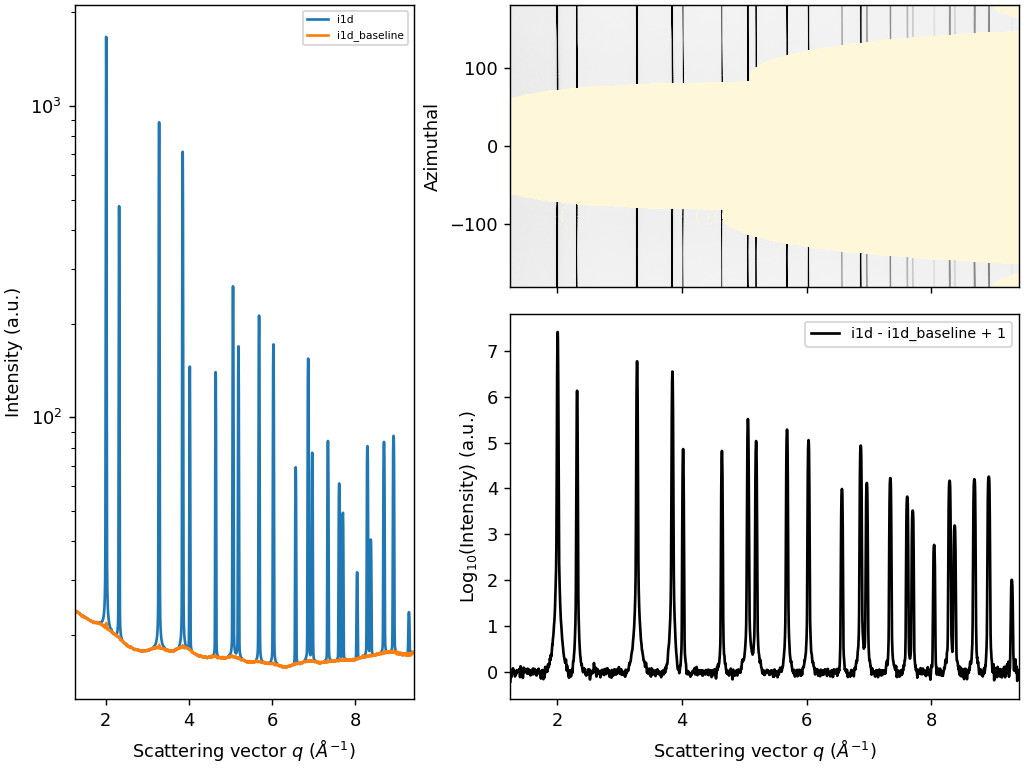

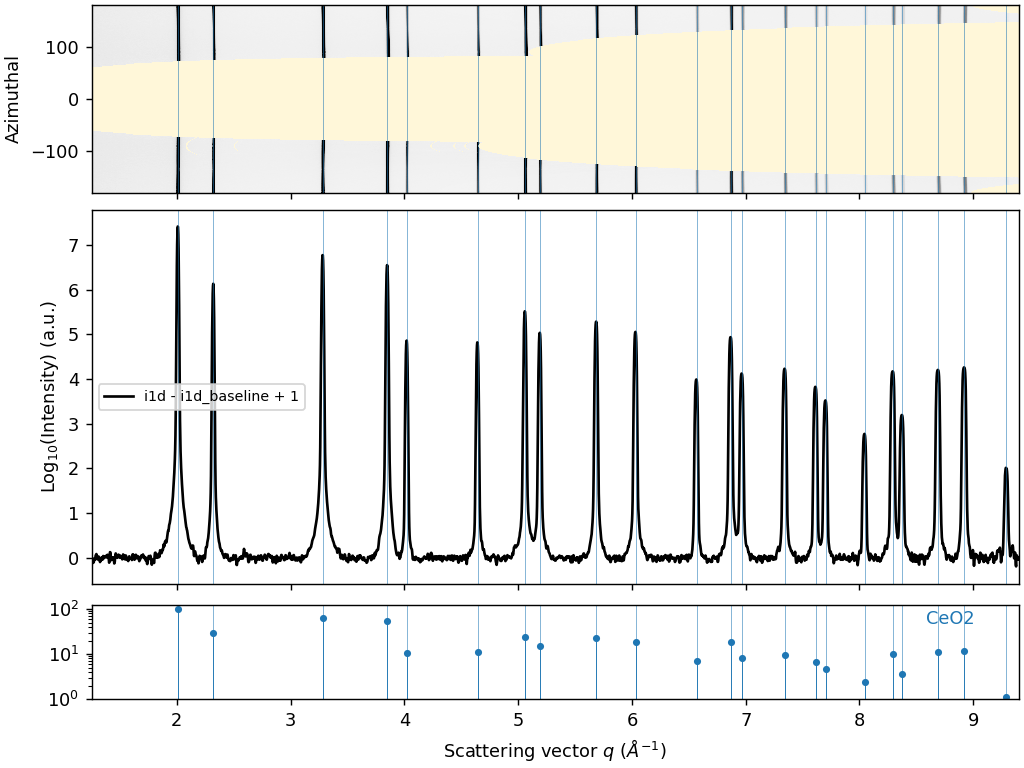

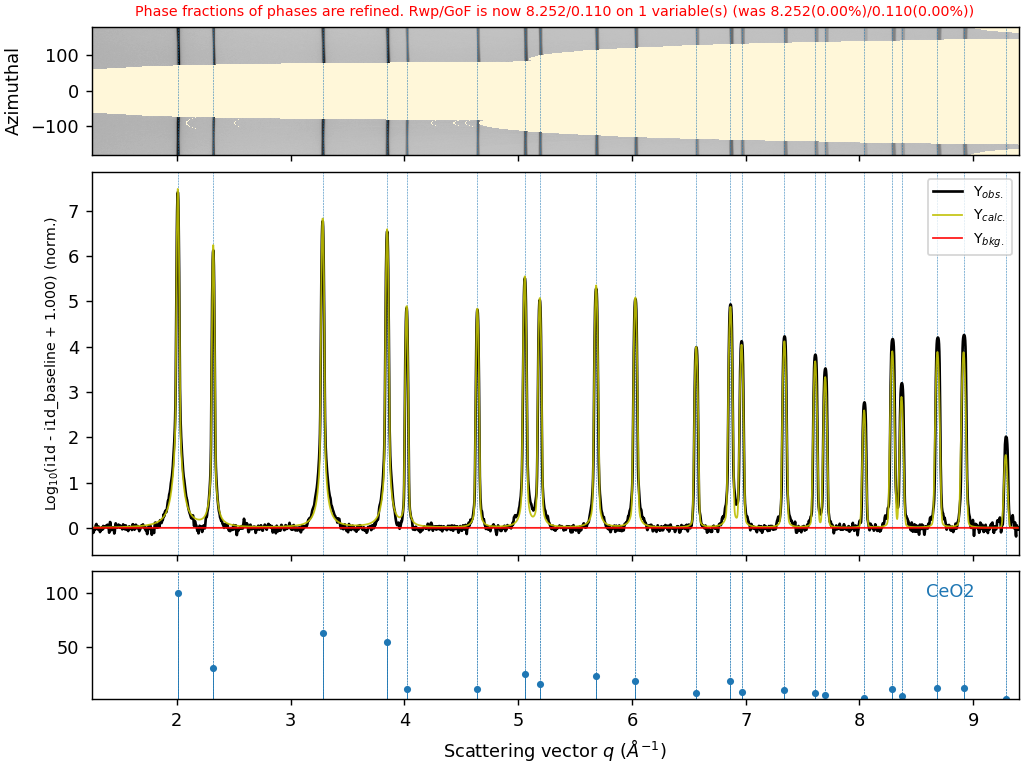

In [9]:
%%time

sample = deepcopy(sample_CeO2)
phases = phases_CeO2

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    # roi_azimuthal_range=(20,50),
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_parameters()
sample.refine_strain_broadening()
sample.refine_size_broadening()

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=0,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)


 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 14.309/0.199 on 1 variable(s) 

 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 8.521/0.119 on 3 variable(s) (was 14.309(-40.45%)/0.199(-40.43%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 8.277/0.115 on 3 variable(s) (was 8.521(-2.87%)/0.119(-2.87%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 8.259/0.115 on 3 variable(s) (was 8.277(-0.22%)/0.115(-0.22%❗))
 ✅--Background is refined. Rwp/GoF is now 8.240/0.115 on 2 variable(s) (was 8.259(-0.23%)/0.115(-0.25%❗))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 12.491/0.174 on 1 variable(s) (was 8.240(51.60%)/0.115(51.58%❗))
 ✅--Phase fractions of all phases are refined. Rwp/GoF is now 10.096/0.141 on 2 variable(s) (was 12.491(-19.17%)/0.174(-19.16%✨))
 ✅--U property of Ce0 site of CeO2 phase is refined. Rwp/GoF is now 9.029/0.126 on 3 variable(s) (was 10.096(-10.58%)/0.141(-10.56%✨))
 ✅--U property of O1 site of CeO

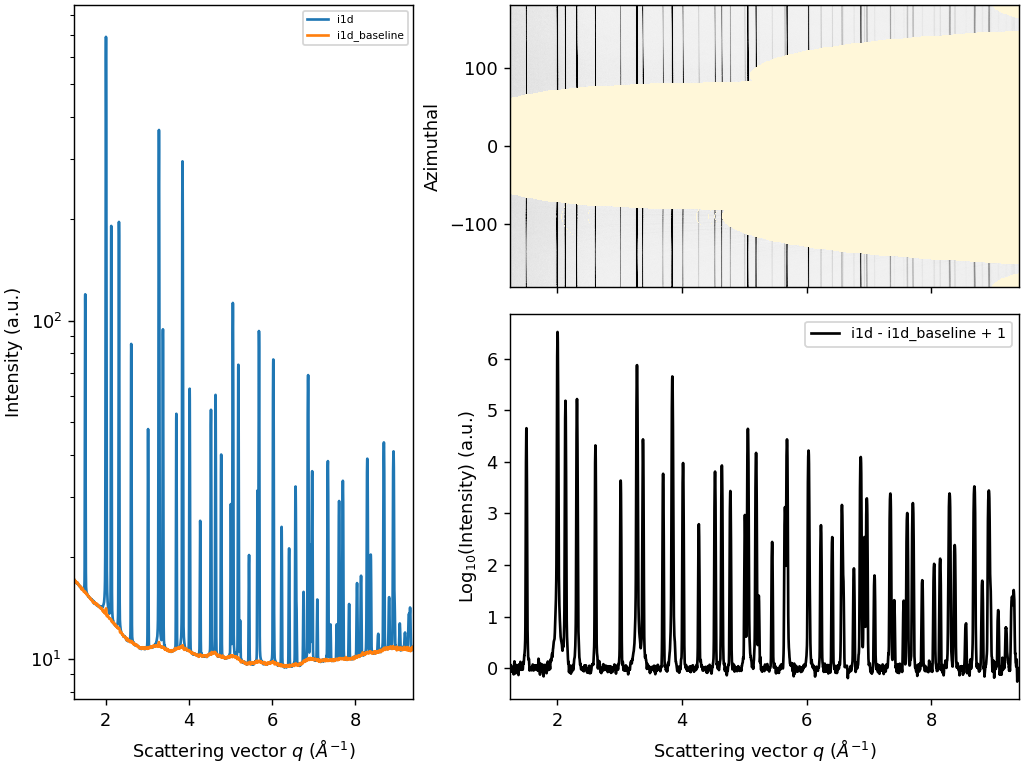

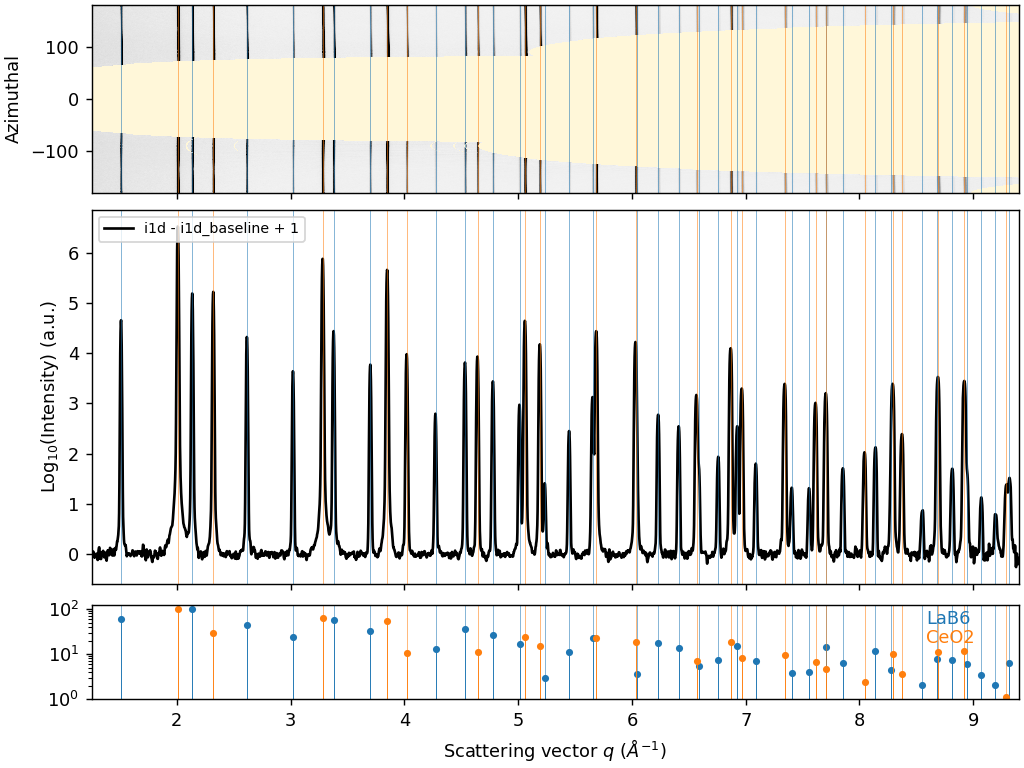

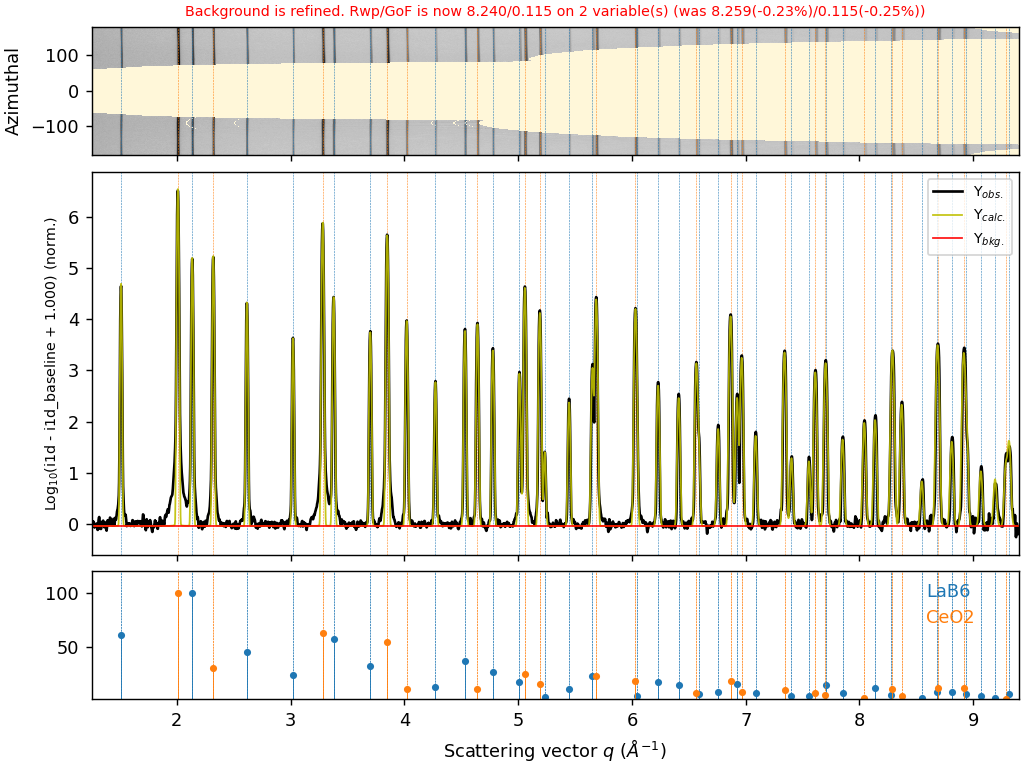

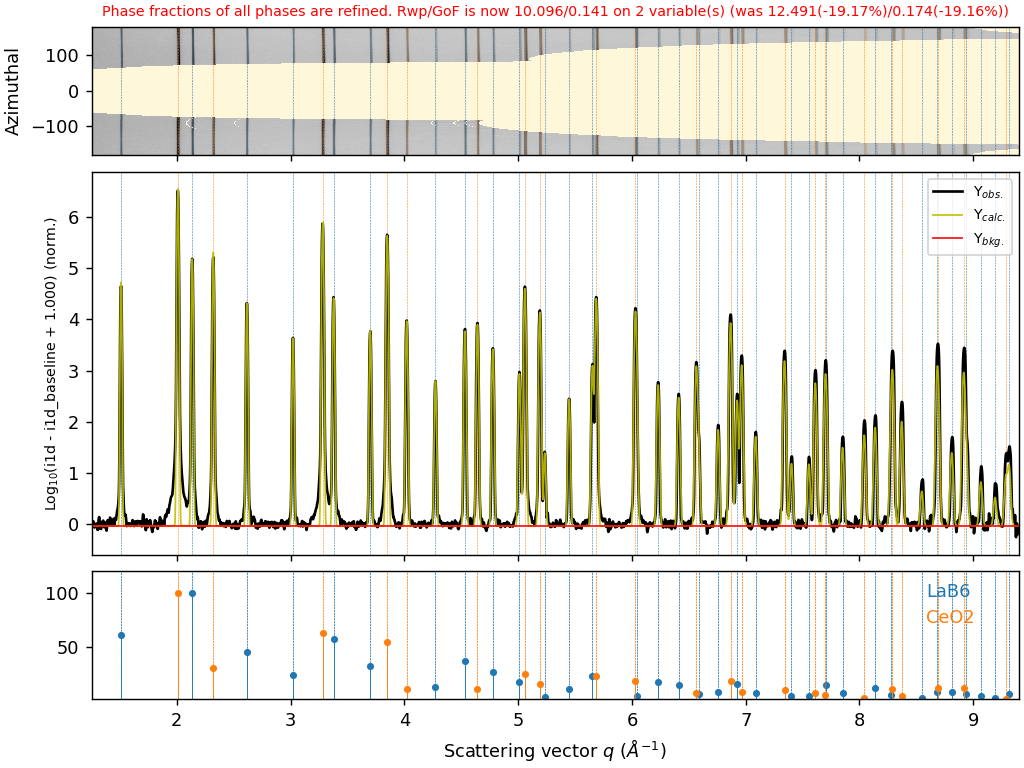

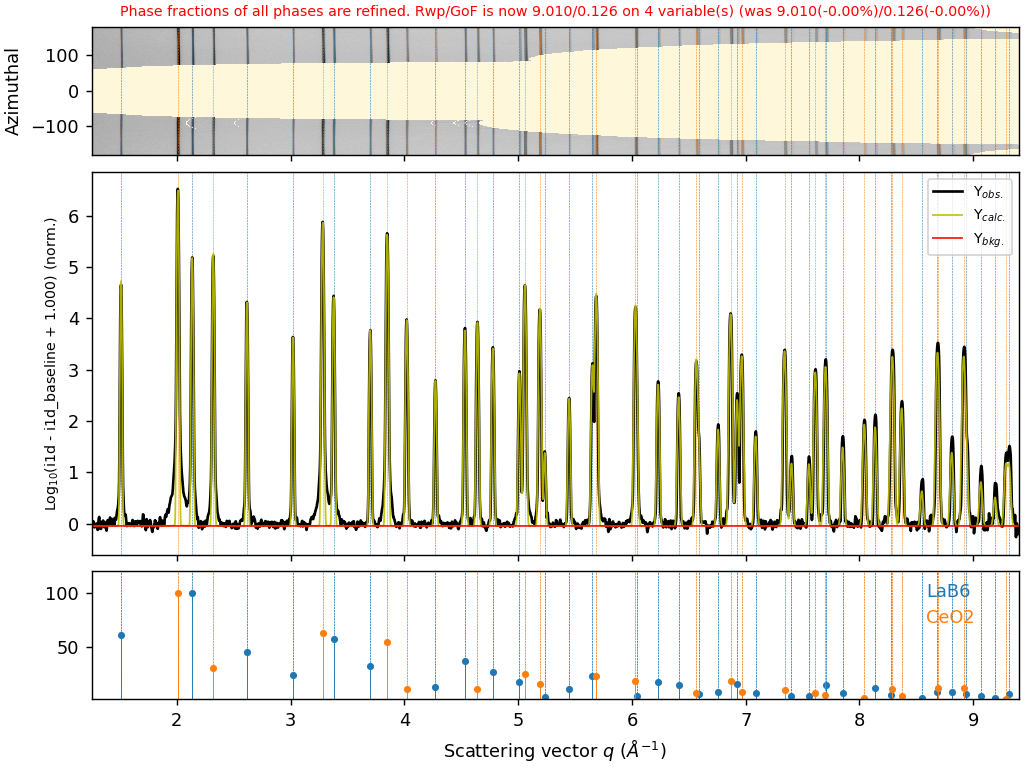

In [15]:
%%time

sample = deepcopy(sample_mix)
phases = phases_mix

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e5,
    use_arpls=True,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_cell_parameters()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=1,plot=True)

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)



 ⏩--1st refinement with LeBail is completed: Rwp/GoF is 39.380/0.662 on 1 variable(s) 

 ✅--Background is refined. Rwp/GoF is now 11.046/0.186 on 11 variable(s) (was 39.380(-71.95%)/0.662(-71.91%✨))
 ✅--Cell parameters of all phases are refined. Rwp/GoF is now 6.424/0.108 on 3 variable(s) (was 11.046(-41.85%)/0.186(-41.92%✨))
 ✅--Strain broadening of all phases are refined. Rwp/GoF is now 6.284/0.106 on 3 variable(s) (was 6.424(-2.17%)/0.108(-2.17%))
 ✅--Size broadening of all phases are refined. Rwp/GoF is now 6.153/0.104 on 3 variable(s) (was 6.284(-2.08%)/0.106(-2.08%))
 ✅--Background is refined. Rwp/GoF is now 6.110/0.103 on 11 variable(s) (was 6.153(-0.69%)/0.104(-0.57%❗))

 ✅--After setting LeBail refinement to True, Rwp/GoF is now 9.584/0.161 on 1 variable(s) (was 6.110(56.84%)/0.103(56.60%❗))
 ✅--Phase fractions of all phases are refined. Rwp/GoF is now 7.672/0.129 on 2 variable(s) (was 9.584(-19.95%)/0.161(-19.93%✨))
 ✅--U property of Ce0 site of CeO2 phase is refined. Rwp/Go

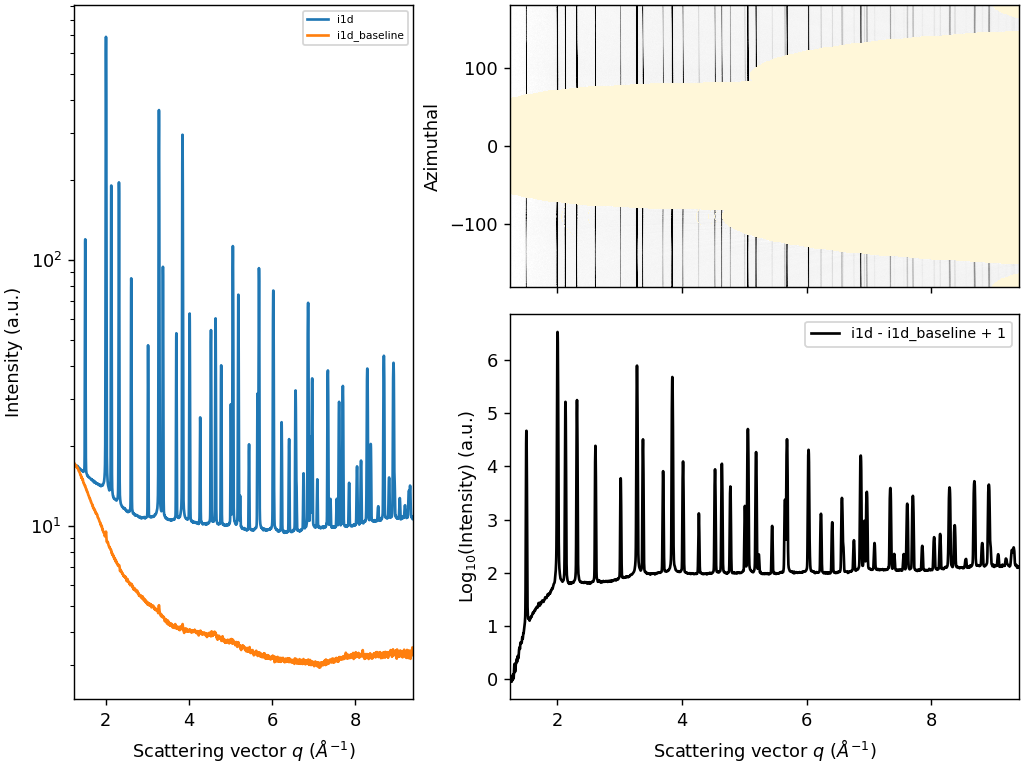

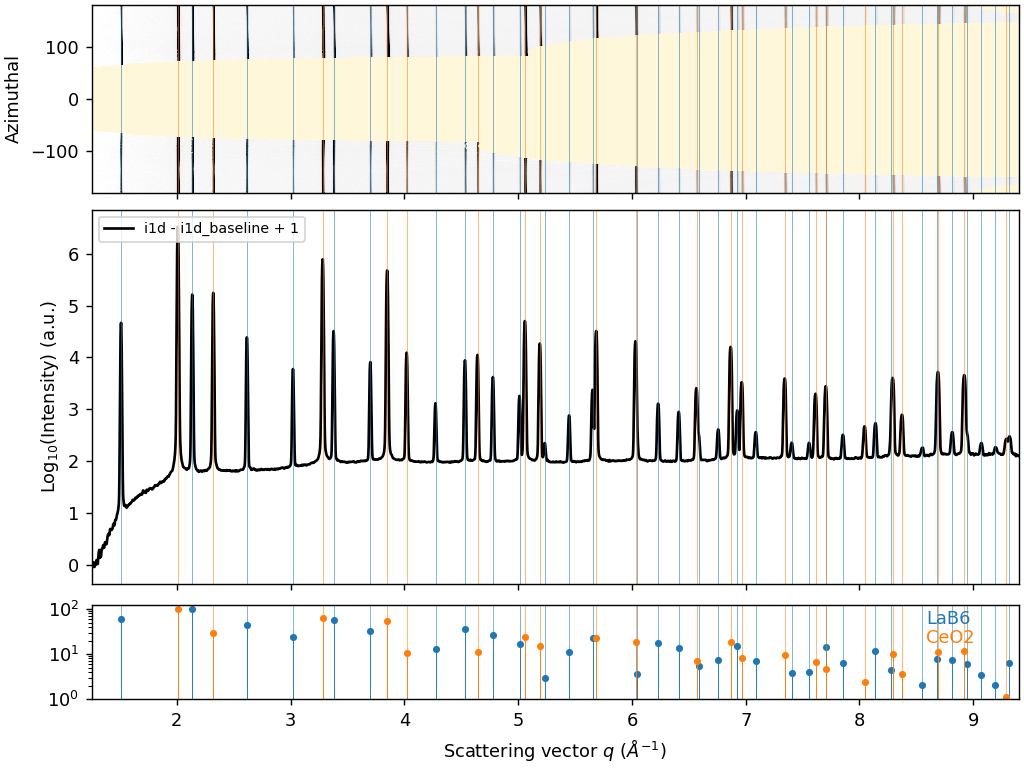

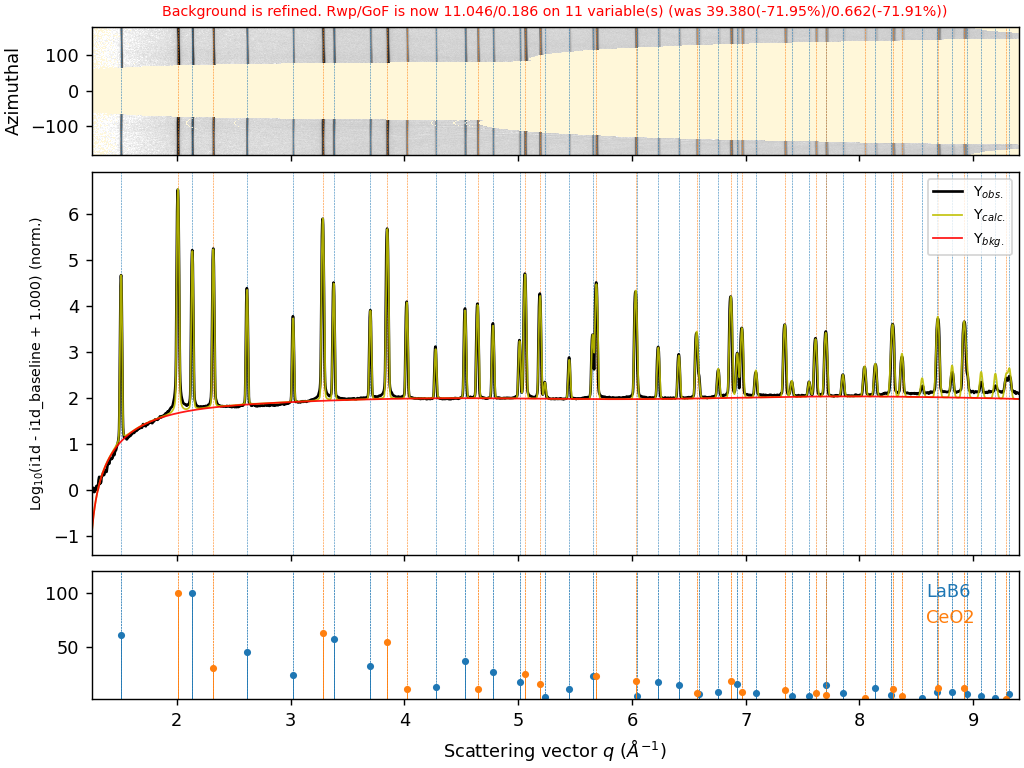

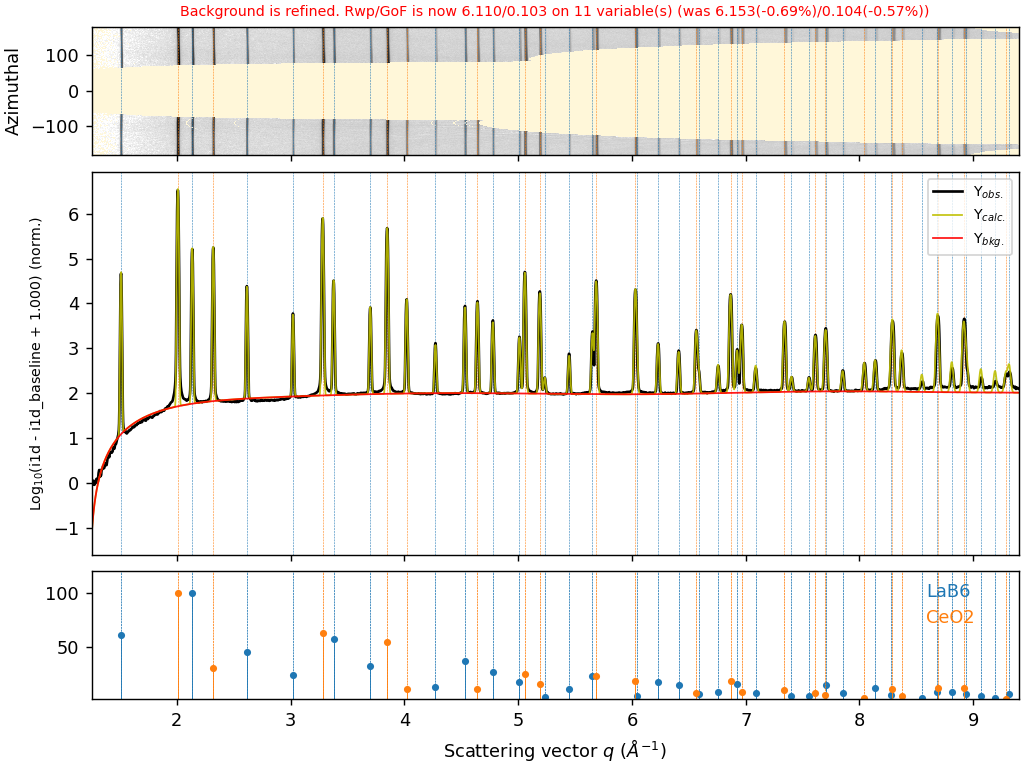

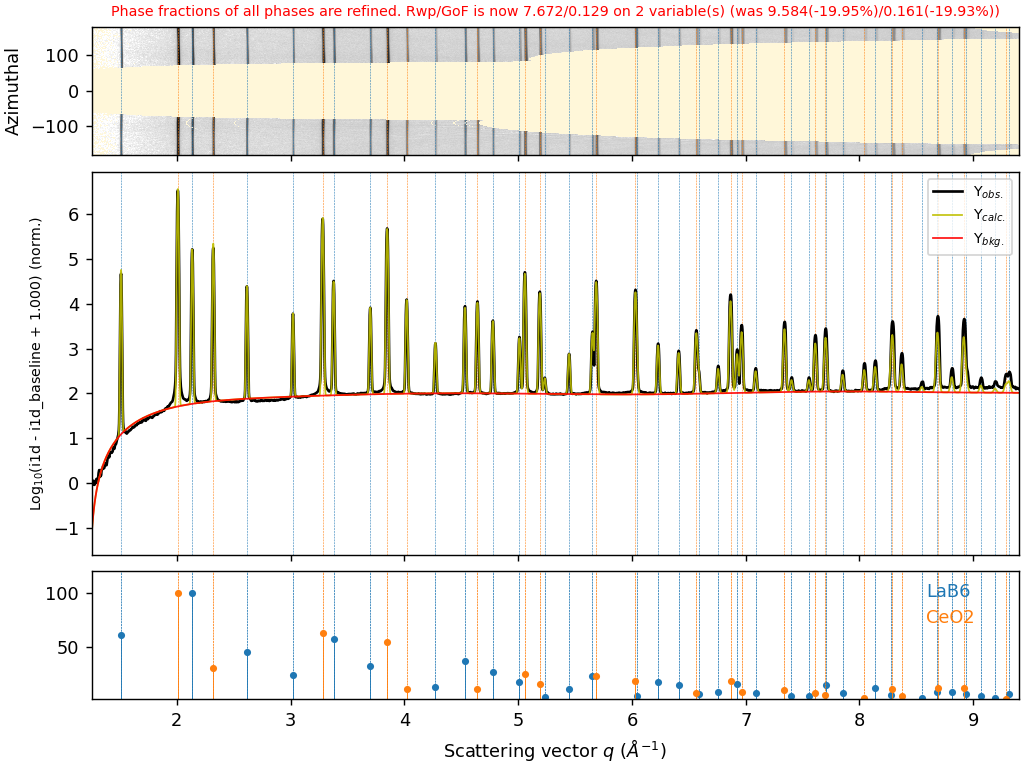

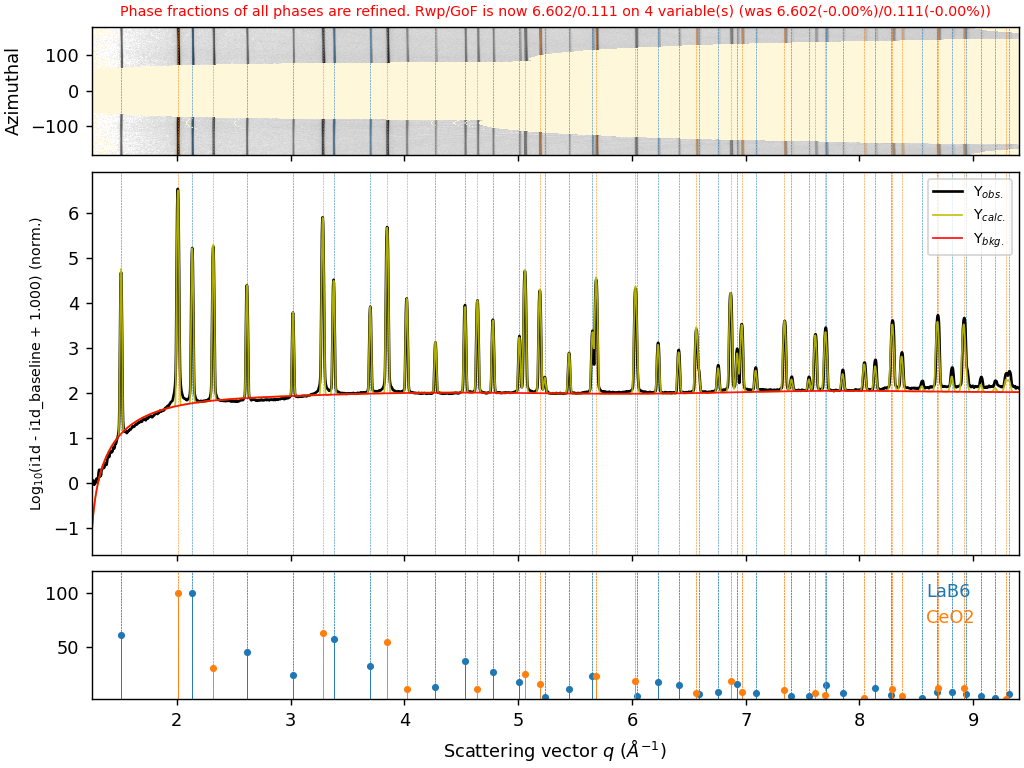

In [17]:
%%time

sample = deepcopy(sample_mix)
phases = phases_mix

sample.get_baseline(
    input_bkg=sample_Kapton,
    arpls_lam=1e5,
    use_arpls=False,
    get_i2d_baseline = False,
    use_i2d_baseline = False,
    roi_radial_range=[1.25, 9.4],
    spotty_data_correction=False,
    spotty_data_correction_threshold=2,
    plot=True,
)
sample.load_phases(phases=phases, plot=True)

# Refinements
sample.setup_gsas2_refiner(instprm_from_gpx="gsas_instprms.gpx",plot=False,normalize=True)
sample.refine_background(num_coeffs=10,plot=True)
sample.refine_cell_parameters()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=10,plot=True)

sample.set_LeBail(set_to=False, refine=True, plot=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=0,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_site_property(phase_ind=1,site_ind=1,refinement_flags='U',set_to_false_after_refinement=False)
sample.refine_phase_fractions(plot=True,set_to_false_after_refinement=False)


 ✅--Background is refined. Rwp/GoF is now 6.270/0.106 on 14 variable(s) (was 6.602(-5.04%)/0.111(-4.89%))


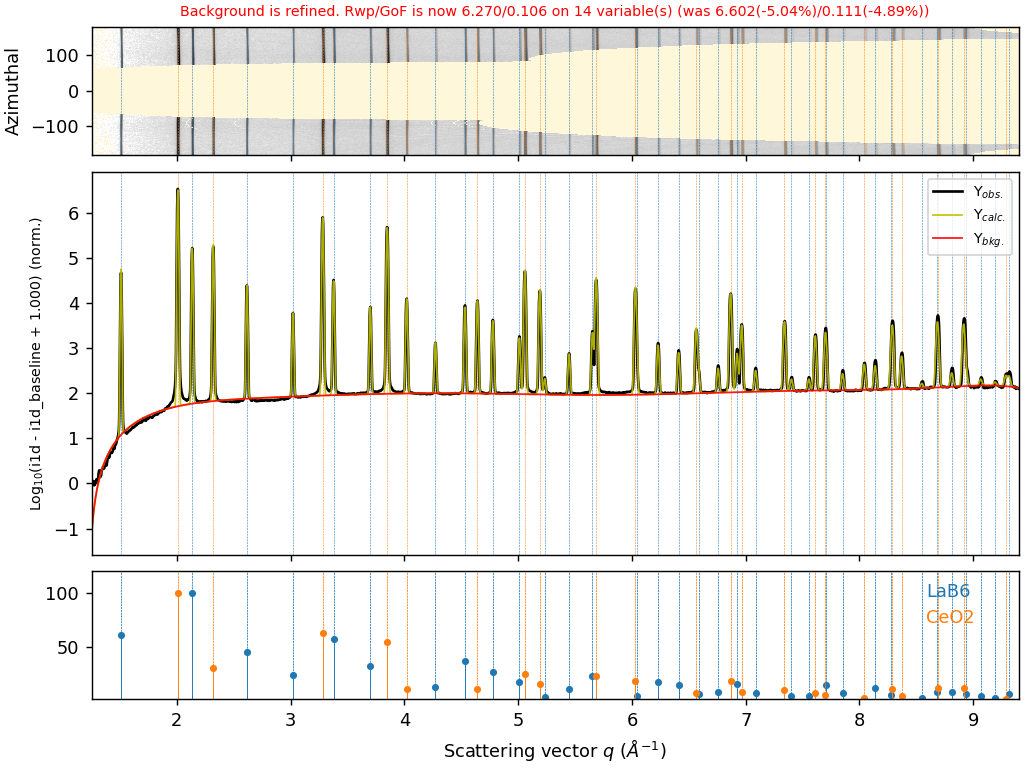

In [18]:
sample.refine_background(num_coeffs=10,plot=True)